<a href="https://colab.research.google.com/github/kiki3177/Skin-Cancer-Detection/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package loading:

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import plotly.graph_objects as go
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from PIL import Image

## Load data and encode diagnosis labels:


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/HAM10000_metadata.csv')
le = LabelEncoder()
le.fit(metadata['dx'])
LabelEncoder()

metadata['label'] = le.transform(metadata["dx"])
metadata.sample(10)

lesion_id      image_id   dx    dx_type   age     sex  \
6994  HAM_0006185  ISIC_0028759   nv      histo  25.0    male   
4768  HAM_0007472  ISIC_0027274   nv  follow_up  60.0    male   
6091  HAM_0004454  ISIC_0029834   nv  follow_up  25.0    male   
8646  HAM_0002171  ISIC_0028529   nv      histo  55.0    male   
2108  HAM_0007488  ISIC_0029157  mel      histo  60.0    male   
9359  HAM_0007058  ISIC_0027642   nv  consensus  50.0    male   
9187  HAM_0000000  ISIC_0028498   nv      histo  60.0    male   
4284  HAM_0002846  ISIC_0028616   nv  follow_up  60.0  female   
7113  HAM_0006934  ISIC_0028287   nv      histo  45.0  female   
4773  HAM_0001676  ISIC_0031587   nv  follow_up  60.0    male   

         localization        dataset  label  
6994            trunk   vidir_modern      5  
4768          abdomen  vidir_molemax      5  
6091            trunk  vidir_molemax      5  
8646             back      rosendahl      5  
2108             back      rosendahl      4  
9359             back   vidir_modern      5  
9187             back      rosendahl      5  
4284             back  vidir_molemax      5  
7113            trunk   vidir_modern      5  
4773  upper extremity  vidir_molemax      5

## Analyze and label distribution by single feature:

In [ ]:
def analyze_symptoms(feature, metadata, le):
    labels = [{} for _ in range(len(list(le.classes_)))]

    for index, row in metadata.iterrows():
        label = row['label']

        if feature == 'sex':
            symptom = row['sex']
        elif feature == 'age':
            symptom = str(row['age'])
        elif feature == 'local':
            symptom = row['localization']
        else:
            raise ValueError("Invalid feature. Choose 'sex', 'age', or 'local'.")

        if symptom in labels[label]:
            labels[label][symptom] += 1
        else:
            labels[label][symptom] = 1

    for i, label in enumerate(labels):
        sorted_dict = dict(sorted(label.items(), key=lambda item: item[1], reverse=True))
        for key in sorted_dict:
            sorted_dict[key] = str(round(sorted_dict[key] * 100 / sum(label.values()), 2)) + "%"
        print("label: ", i, "\n", sorted_dict)


analyze_symptoms('sex', metadata, le)
print("-------------------------------------------------------------")
analyze_symptoms('age', metadata, le)
print("-------------------------------------------------------------")
analyze_symptoms('local', metadata, le)


label:  0 
 {'male': '67.58%', 'female': '32.42%'}
label:  1 
 {'male': '61.67%', 'female': '38.33%'}
label:  2 
 {'male': '56.96%', 'female': '42.13%', 'unknown': '0.91%'}
label:  3 
 {'male': '54.78%', 'female': '45.22%'}
label:  4 
 {'male': '61.9%', 'female': '38.1%'}
label:  5 
 {'male': '51.02%', 'female': '48.28%', 'unknown': '0.7%'}
label:  6 
 {'female': '51.41%', 'male': '48.59%'}
-------------------------------------------------------------
label:  0 
 {'60.0': '17.74%', '70.0': '17.13%', '75.0': '14.37%', '65.0': '11.62%', '80.0': '11.31%', '55.0': '8.26%', '85.0': '7.65%', '50.0': '5.81%', '45.0': '3.06%', '40.0': '2.75%', '30.0': '0.31%'}
label:  1 
 {'70.0': '16.54%', '65.0': '15.37%', '75.0': '14.79%', '80.0': '14.2%', '85.0': '10.12%', '60.0': '6.81%', '50.0': '5.25%', '45.0': '5.06%', '55.0': '4.86%', '40.0': '4.47%', '35.0': '0.97%', '30.0': '0.78%', '25.0': '0.58%', '20.0': '0.19%'}
label:  2 
 {'70.0': '16.65%', '75.0': '13.92%', '60.0': '11.92%', '65.0': '9.83%', 

## Analyze and label distribution by combined features:

In [ ]:
def analyze_symptoms(sex, age ,local, metadata):
  labels = []
  for i in range(len(list(le.classes_))):
    labels.append({})
  for index, row in metadata.iterrows():

      label = row['label']

      age = str(row['age']) if age else ""
      sex = row['sex'] if sex else ""
      local = row['localization'] if local else ""
      symptom = f"{age}-{sex}-{local}"

      if symptom in labels[label]:
        labels[label][symptom] += 1
      else:
        labels[label][symptom] = 1

  for i,label in enumerate(labels):
    sorted_dict = dict(sorted(label.items(), key=lambda item: item[1], reverse=True))
    for key in sorted_dict:
      sorted_dict[key]= str(round(sorted_dict[key]*100/sum(label.values()),2)) + "%"
    print("label: ", i , "\n", sorted_dict)

analyze_symptoms(True,True,True, metadata)
print("-------------------------------------------------------------")
analyze_symptoms(True,False,True, metadata)
print("-------------------------------------------------------------")
analyze_symptoms(True,True,False, metadata)
print("-------------------------------------------------------------")
analyze_symptoms(False,True,True, metadata)

label:  0 
 {'60.0-male-face': '4.89%', '75.0-female-lower extremity': '3.98%', '60.0-female-face': '3.67%', '70.0-male-upper extremity': '3.06%', '65.0-female-face': '3.06%', '70.0-male-lower extremity': '3.06%', '70.0-female-face': '2.75%', '80.0-male-face': '2.75%', '75.0-male-lower extremity': '2.75%', '60.0-male-back': '2.45%', '50.0-male-upper extremity': '2.45%', '85.0-male-upper extremity': '2.45%', '70.0-male-face': '2.45%', '80.0-female-upper extremity': '2.14%', '60.0-female-lower extremity': '2.14%', '55.0-male-face': '2.14%', '55.0-female-face': '2.14%', '65.0-male-lower extremity': '1.83%', '80.0-male-scalp': '1.83%', '60.0-male-lower extremity': '1.83%', '75.0-male-face': '1.83%', '65.0-male-upper extremity': '1.83%', '45.0-male-face': '1.83%', '80.0-female-face': '1.53%', '65.0-male-face': '1.53%', '85.0-male-back': '1.22%', '85.0-male-lower extremity': '1.22%', '75.0-male-chest': '1.22%', '50.0-male-face': '1.22%', '75.0-male-neck': '1.22%', '55.0-male-lower extremity'

In [ ]:
print("Label 3 corresponds to:", le.inverse_transform([3])[0])

Label 3 corresponds to: df


## Spot skewed distribution of Dermatofibroma (label 3) across different localizations, explore further with visualization:


In [ ]:
label = 3
labels = {}

for loc in metadata['localization'].unique():
    labels[loc] = 0

for _, row in metadata.iterrows():
    if row['label'] == label:
        localization = row['localization']
        labels[localization] += 1

sorted_labels = {k: v for k, v in sorted(labels.items(), key=lambda item: item[1], reverse=True)}

x_values = list(sorted_labels.keys())
y_values = list(sorted_labels.values())

total_count = sum(y_values)
percentages = [round((count / total_count) * 100, 2) for count in y_values]

fig = go.Figure(data=[go.Bar(x=x_values, y=y_values, text=[f'{p}%' for p in percentages], textposition='inside', marker_color='blue')])
fig.update_layout(
    title=f'Distribution of df - Dermatofibroma - Across Localizations',
    xaxis_title='Localization',
    yaxis_title='Count',
    plot_bgcolor='white',
    width=700,
    height=700,
    )
fig.show()


## Visualize distribution of diagnostic lable, sex, localization, gender:


In [ ]:
def generate_colors(values):
    num_values = len(values)
    colors = [f'hsl({h},70%,50%)' for h in np.linspace(0, 360, num_values)]
    return colors

# Plot 1: Cell Type
cell_type_values = metadata['dx'].value_counts()
fig1 = go.Figure(data=[go.Bar(x=cell_type_values.index, y=cell_type_values, marker_color=generate_colors(cell_type_values), marker_line_width=1.5)])
fig1.update_layout(title='Diagnosis Category', yaxis_title='Count', xaxis_title='Diagnosis Category', plot_bgcolor='white')

# Plot 2: Sex
sex_values = metadata['sex'].value_counts()
fig2 = go.Figure(data=[go.Bar(x=sex_values.index, y=sex_values, marker_color=generate_colors(sex_values), marker_line_width=1.5)])
fig2.update_layout(title='Sex', yaxis_title='Count', xaxis_title='Sex', plot_bgcolor='white')

# Plot 3: Localization
localization_values = metadata['localization'].value_counts()
fig3 = go.Figure(data=[go.Bar(x=localization_values.index, y=localization_values, marker_color=generate_colors(localization_values), marker_line_width=1.5)])
fig3.update_layout(title='Localization', yaxis_title='Count', xaxis_title='Localization', plot_bgcolor='white')

# Plot 4: Age
fig4 = go.Figure(data=[go.Histogram(x=metadata['age'].dropna(),  marker_line_width=1.5)])
fig4.update_layout(title='Age', yaxis_title='Count', xaxis_title='Age', plot_bgcolor='white')

fig = make_subplots(rows=2, cols=2, subplot_titles=("Diagnosis Category", "Sex", "Localization", "Age"))

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)

fig.update_layout(height=800, width=800, title_text="Data Distribution", showlegend=False)

fig.show()


## Identify the skewed distribution where Melanocytic Nevi is dominant, check its percentage:

In [ ]:
dx_counts = metadata['dx'].value_counts()

nv_count = dx_counts.get('nv', 0)

nv_percentage = (nv_count / len(metadata)) * 100

print("Melanocytic Nevi: {:.2f}%".format(nv_percentage))

Melanocytic Nevi: 66.95%


## Sample 5 images of each label in 20 x 20:

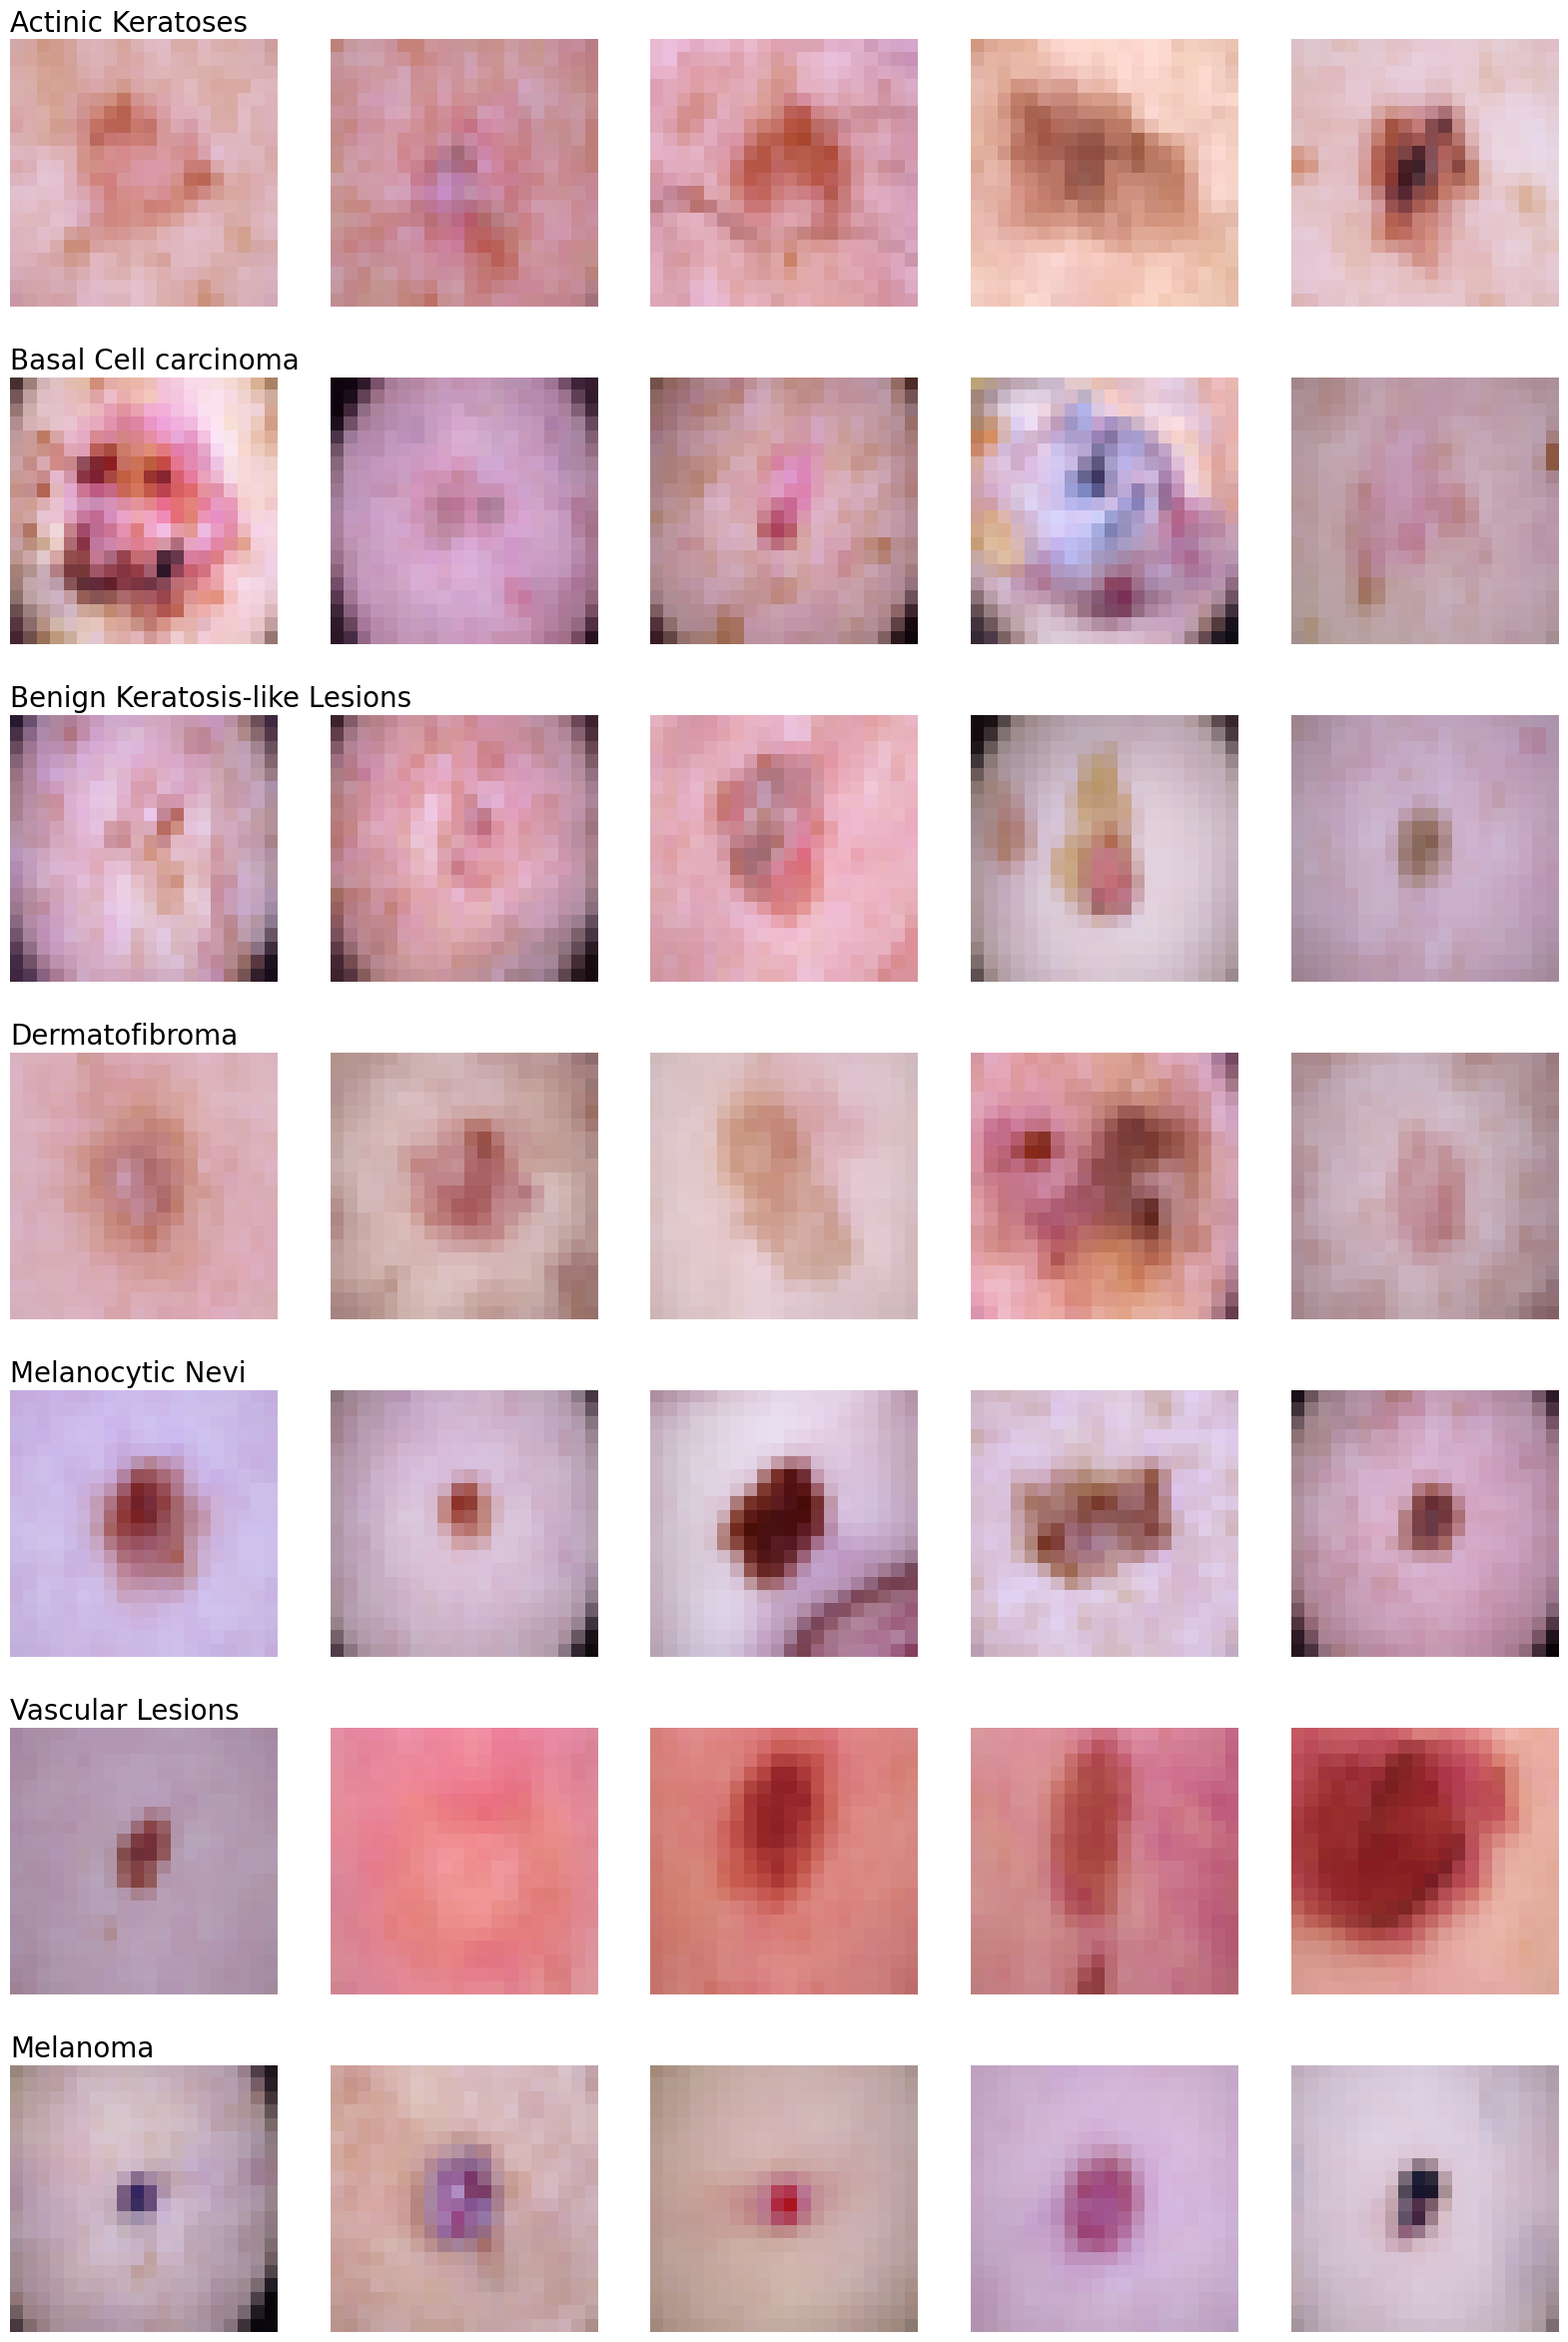

In [ ]:

fig = plt.figure(figsize=(20, 30))
j=0
names = ['Actinic Keratoses', 'Basal Cell carcinoma', 'Benign Keratosis-like Lesions','Dermatofibroma',
         'Melanocytic Nevi','Vascular Lesions','Melanoma']

for class_number in range(7):
  indices = metadata.index[metadata['label'] == class_number].tolist()

  example = metadata.loc[indices]
  final_example = []
  for i,e in enumerate(example['image_id']):
    if e+".jpg" <= 'ISIC_0025775.jpg':
      final_example.append(e)
  final_example = final_example[:5]

  for i, picture_name in enumerate(final_example):
      n=i+j
      image = Image.open(f'/content/drive/MyDrive/HAM1000/{picture_name}.jpg')

      reshaped_image = np.array(image.resize((20, 20)))

      plt.subplot(7,5,n+1)
      plt.imshow(reshaped_image)
      if i ==0:
          plt.title(f'{names[class_number]}', size=20, loc='left')

      plt.axis('off')
  j+=5
plt.show()
fig.savefig('small_pix_sample.jpg')

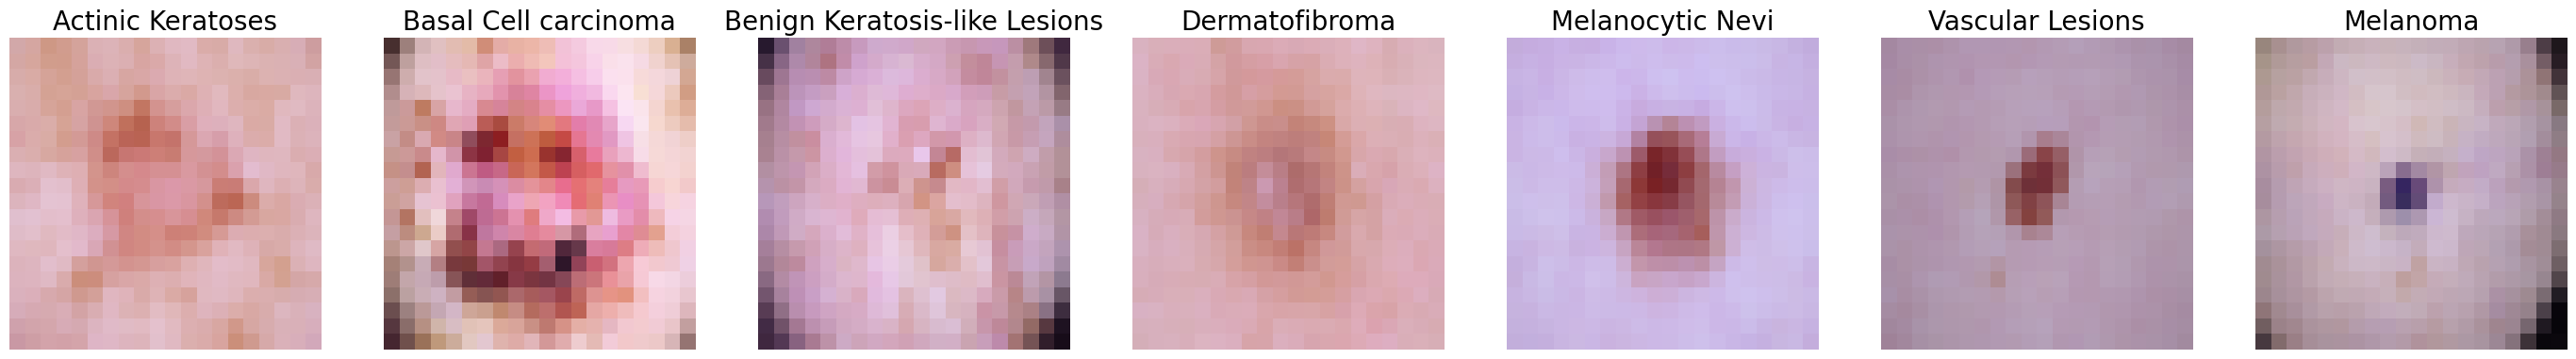

In [ ]:
fig = plt.figure(figsize=(35, 10))

names = ['Actinic Keratoses', 'Basal Cell carcinoma', 'Benign Keratosis-like Lesions','Dermatofibroma',
         'Melanocytic Nevi','Vascular Lesions','Melanoma']

for class_number in range(7):
    indices = metadata.index[metadata['label'] == class_number].tolist()
    example = metadata.loc[indices]

    final_example = []
    for i, e in enumerate(example['image_id']):
        if e + ".jpg" <= 'ISIC_0025775.jpg':
            final_example.append(e)
            if len(final_example) == 1:
                break

    if len(final_example) == 0:
        continue

    picture_name = final_example[0]

    image = Image.open(f'/content/drive/MyDrive/HAM1000/{picture_name}.jpg')
    reshaped_image = np.array(image.resize((20, 20)))

    plt.subplot(1, 7, class_number + 1)
    plt.imshow(reshaped_image)
    plt.title(f'{names[class_number]}', size=20)
    plt.axis('off')

plt.show()
fig.savefig('small_pix_sample.jpg')



## Sample 5 images of each label in 600 x 600:

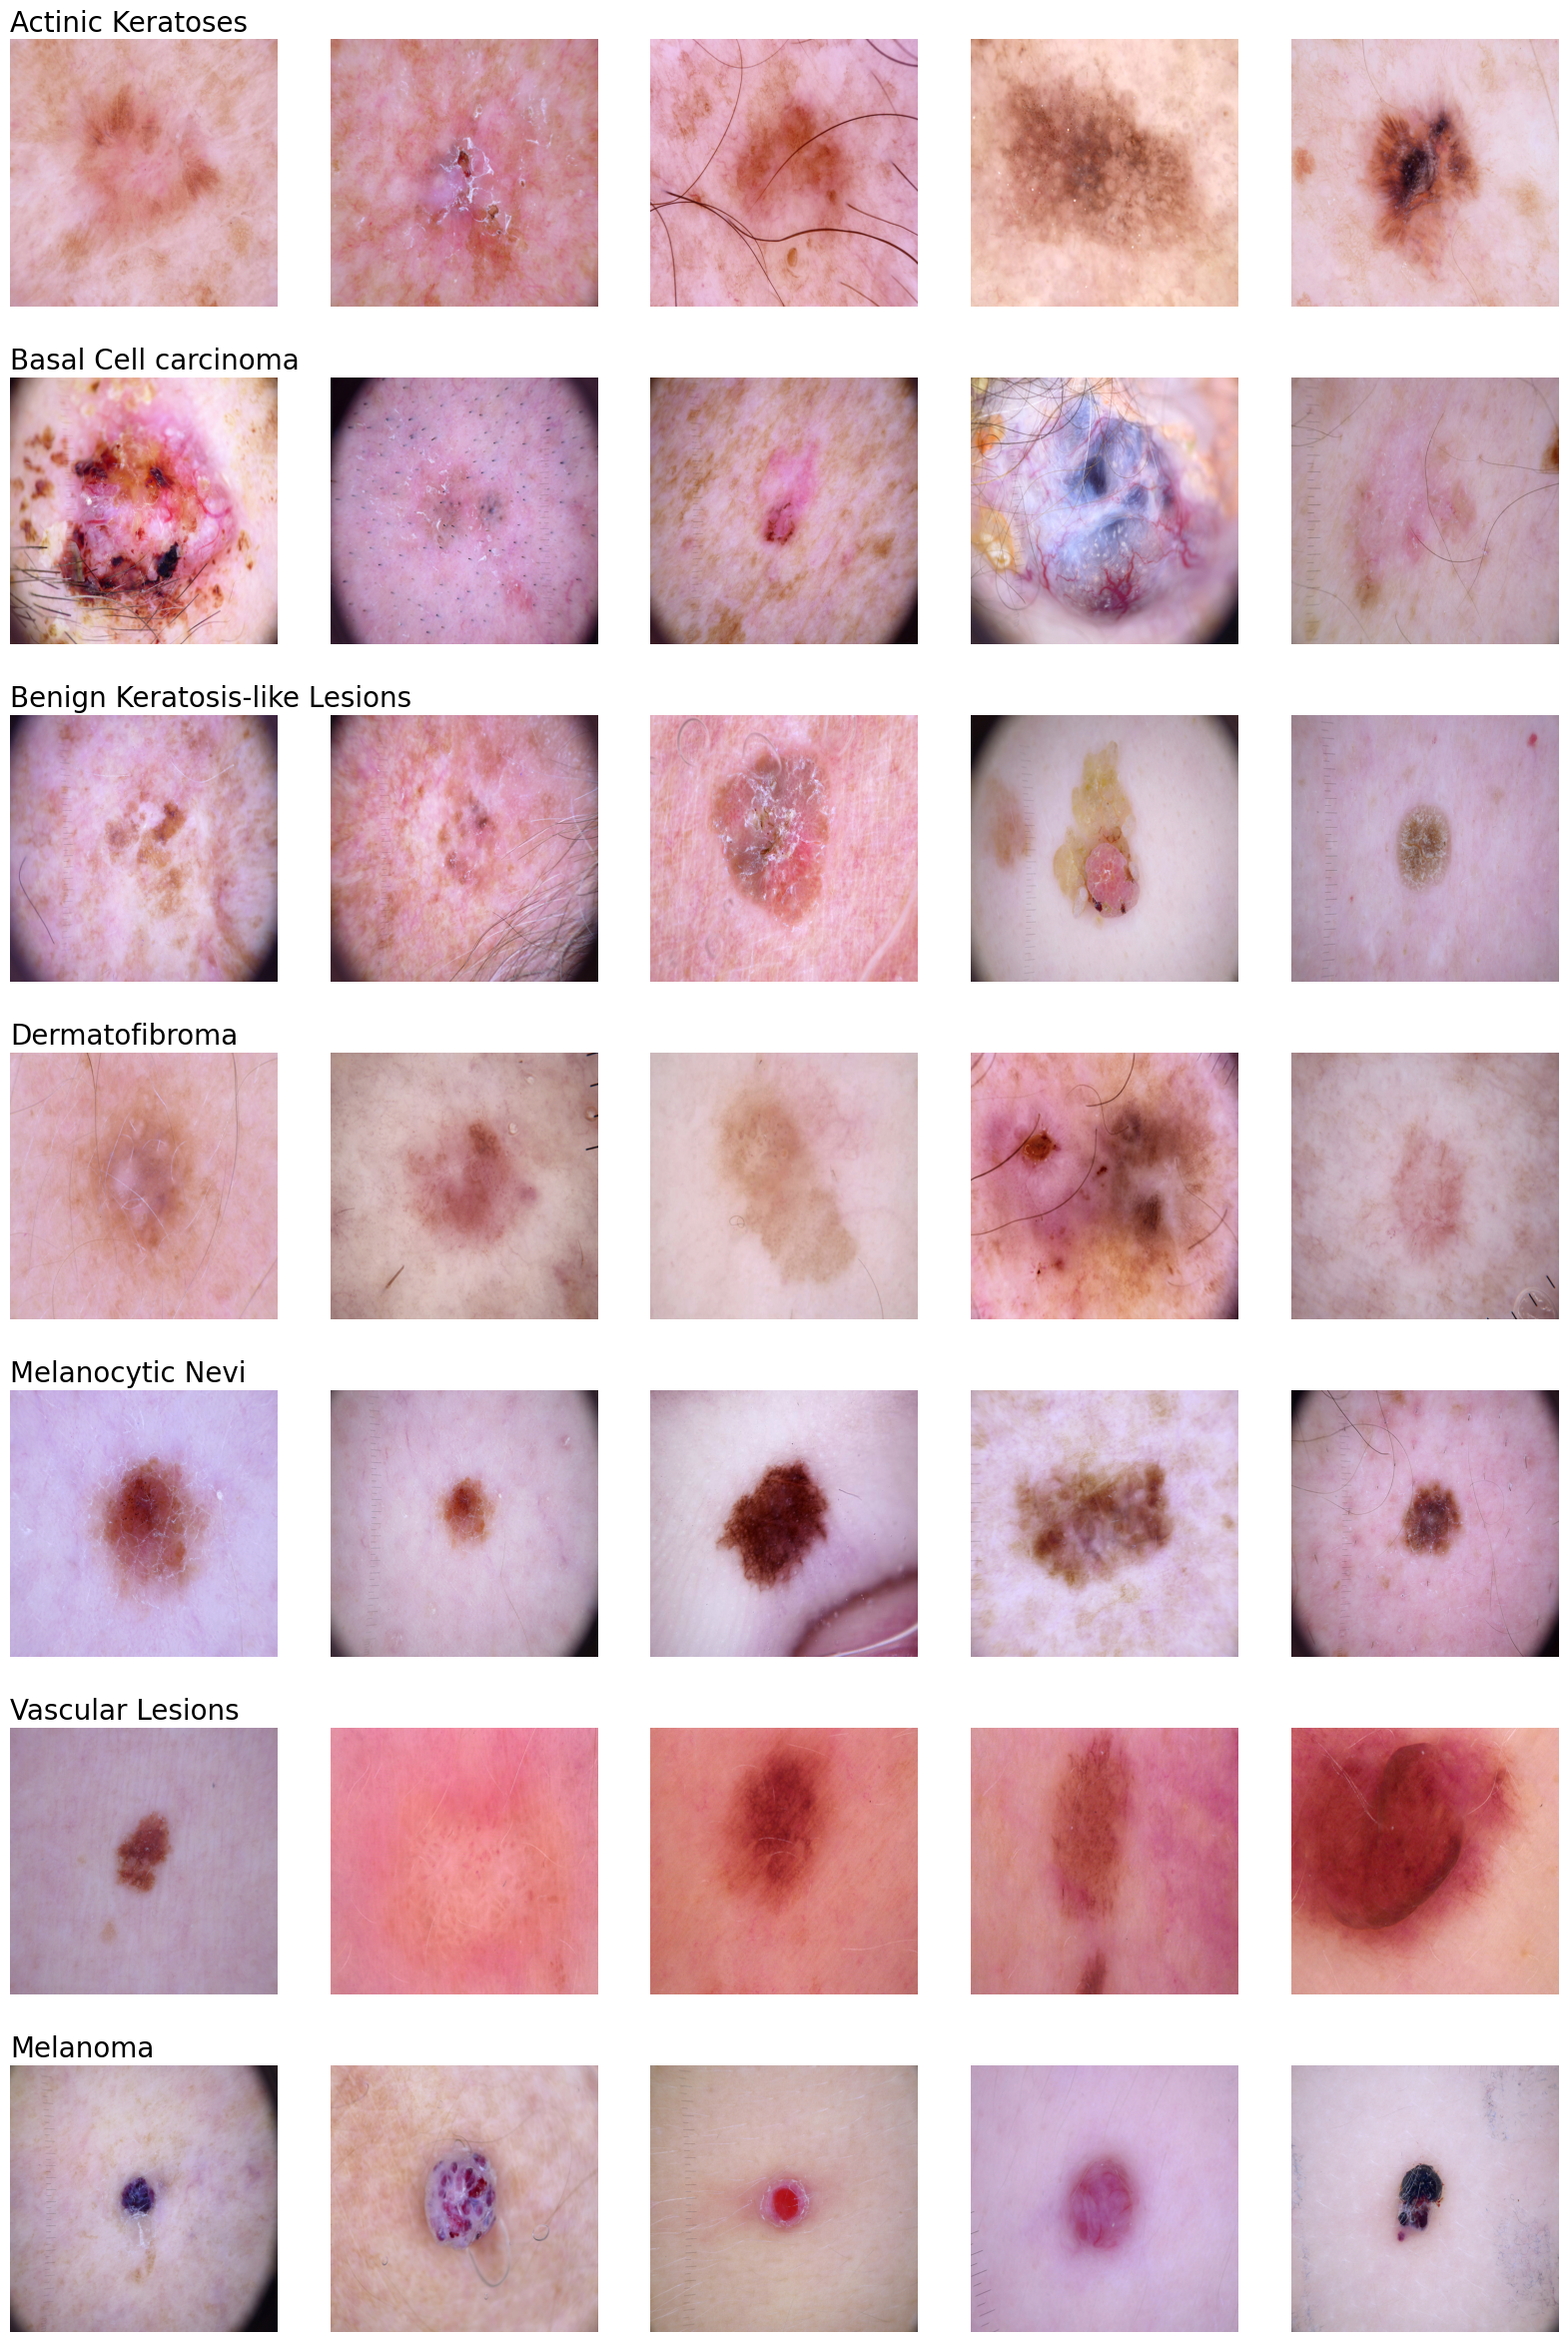

In [ ]:

fig = plt.figure(figsize=(20, 30))
j=0
names = ['Actinic Keratoses', 'Basal Cell carcinoma', 'Benign Keratosis-like Lesions','Dermatofibroma',
         'Melanocytic Nevi','Vascular Lesions','Melanoma']

for class_number in range(7):
  indices = metadata.index[metadata['label'] == class_number].tolist()

  example = metadata.loc[indices]
  final_example = []
  for i,e in enumerate(example['image_id']):
    if e+".jpg" <= 'ISIC_0025775.jpg':
      final_example.append(e)
  final_example = final_example[:5]

  for i, picture_name in enumerate(final_example):
      n=i+j
      image = Image.open(f'/content/drive/MyDrive/HAM1000/{picture_name}.jpg')

      reshaped_image = np.array(image.resize((600, 600)))

      plt.subplot(7,5,n+1)
      plt.imshow(reshaped_image)
      if i ==0:
          plt.title(f'{names[class_number]}', size=20, loc='left')

      plt.axis('off')
  j+=5
plt.show()
fig.savefig('small_pix_sample.jpg')

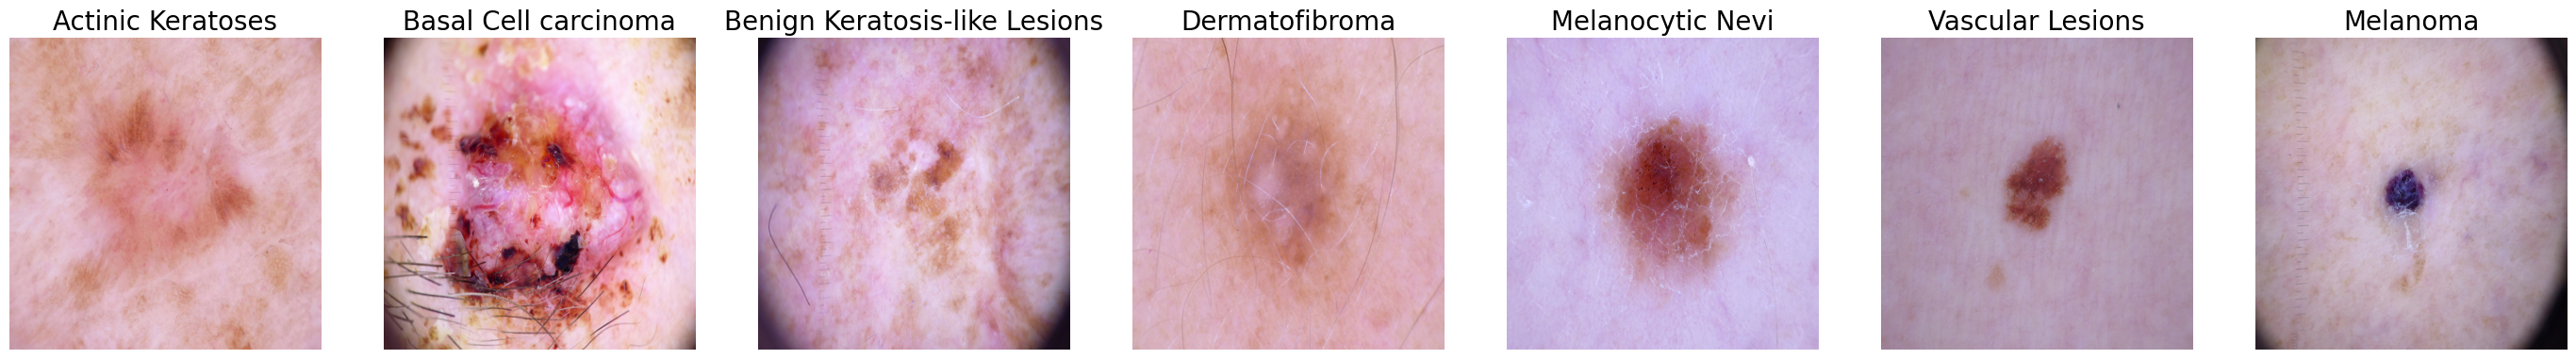

In [ ]:
fig = plt.figure(figsize=(35, 10))

names = ['Actinic Keratoses', 'Basal Cell carcinoma', 'Benign Keratosis-like Lesions','Dermatofibroma',
         'Melanocytic Nevi','Vascular Lesions','Melanoma']

for class_number in range(7):
    indices = metadata.index[metadata['label'] == class_number].tolist()
    example = metadata.loc[indices]

    final_example = []
    for i, e in enumerate(example['image_id']):
        if e + ".jpg" <= 'ISIC_0025775.jpg':
            final_example.append(e)
            if len(final_example) == 1:
                break

    if len(final_example) == 0:
        continue

    picture_name = final_example[0]

    image = Image.open(f'/content/drive/MyDrive/HAM1000/{picture_name}.jpg')
    reshaped_image = np.array(image.resize((600, 600)))

    plt.subplot(1, 7, class_number + 1)
    plt.imshow(reshaped_image)
    plt.title(f'{names[class_number]}', size=20)
    plt.axis('off')

plt.show()
fig.savefig('small_pix_sample.jpg')